***
# Bank Customer Churn Modelling
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Bank Churn Modelling.csv")

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.duplicated("CustomerId").sum()

0

In [6]:
df = df.set_index("CustomerId")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## Data Encoding

In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.replace({"Geography" : {"France":2, "Germany":1, "Spain":0}}, inplace=True)

In [10]:
df["Gender"].value_counts() 

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.replace({"Gender" : {"Male" : 0, "Female" : 1}}, inplace=True)

In [12]:
df["Num Of Products"].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [13]:
df.replace({"Num Of Products" : {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [14]:
df["Has Credit Card"].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [15]:
df["Is Active Member"].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [16]:
df.loc[(df["Balance"]==0), "Churn"].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [17]:
df["Zero Balance"] = np.where(df["Balance"]>0, 1, 0)

In [18]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1,0
15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0,1
15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1,1
15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0,0
15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0,1


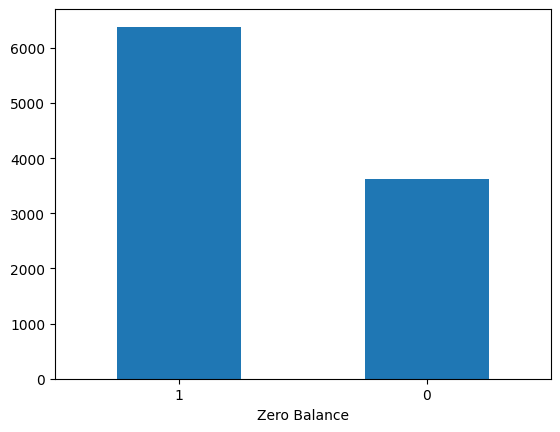

In [19]:
df["Zero Balance"].value_counts().plot(kind="bar")
plt.xticks(rotation = "horizontal")
plt.show()

In [20]:
 df.groupby(["Churn", "Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

## Define Label and Features

In [21]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [22]:
X = df.drop(["Surname", "Churn"], axis = 1)
Y = df["Churn"]

In [23]:
X.shape, Y.shape

((10000, 11), (10000,))

## Handling Imbalance Data

In [24]:
df["Churn"].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<AxesSubplot: xlabel='Churn', ylabel='count'>

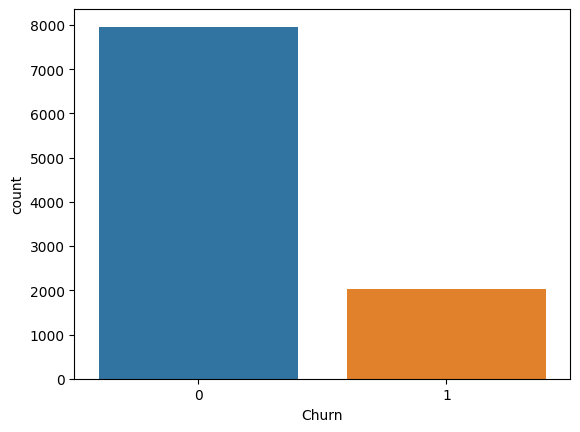

In [25]:
sns.countplot(x = "Churn", data = df)

***
* Random Under Sampling
***

In [26]:
from imblearn.under_sampling import RandomUnderSampler
rus =RandomUnderSampler()
X_rus, Y_rus = rus.fit_resample(X, Y)

In [27]:
X_rus.shape, Y_rus.shape, X.shape, Y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [28]:
Y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [29]:
Y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<AxesSubplot: ylabel='Frequency'>

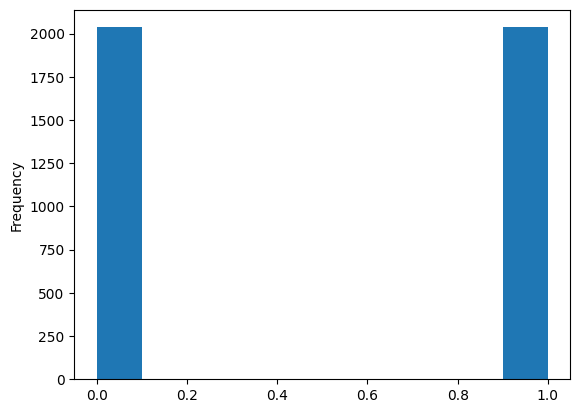

In [30]:
Y_rus.plot(kind = "hist")

***
* Random Over Sampling
***

In [31]:
from imblearn.over_sampling import RandomOverSampler
ros =RandomOverSampler()
X_ros, Y_ros = ros.fit_resample(X, Y)

In [32]:
X_ros.shape, Y_ros.shape, X.shape, Y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [33]:
Y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [34]:
Y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<AxesSubplot: ylabel='Frequency'>

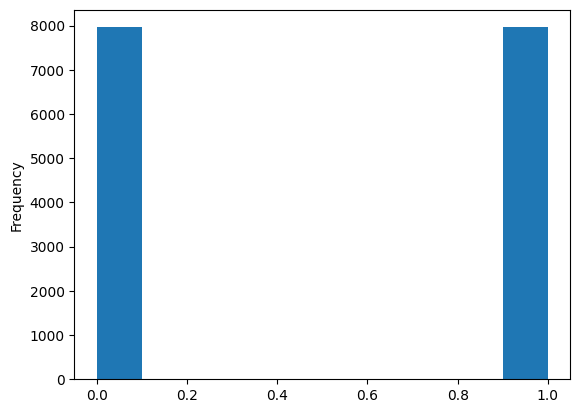

In [35]:
Y_ros.plot(kind = "hist")

## Model Building

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)
X_train_rus, X_test_rus, Y_train_rus, Y_test_rus = train_test_split(X_rus, Y_rus, test_size=0.3, random_state=2529)
X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(X_ros, Y_ros, test_size=0.3, random_state=2529)

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [38]:
X_train[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(X_train[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])

X_test[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(X_test[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])

In [39]:
X_train_rus[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(X_train_rus[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])

X_test_rus[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(X_test_rus[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])

In [40]:
X_train_ros[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(X_train_ros[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])

X_test_ros[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(X_test_ros[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])

***
* Support Vector Machine Classifier
***

In [41]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
confusion_matrix(Y_test, Y_pred)

array([[2381,   33],
       [ 436,  150]], dtype=int64)

In [44]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid ={ "C" : [0.1, 1, 10],
              "gamma" : [1, 0.1, 0.01],
              "kernel" : ["rbf"],
              "class_weight" : ["balanced"]}

In [47]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [48]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [49]:
grid_predictions = grid.predict(X_test)

In [50]:
confusion_matrix(Y_test, grid_predictions)

array([[2159,  255],
       [ 343,  243]], dtype=int64)

In [51]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [52]:
svc_rus = SVC()
svc_rus.fit(X_train_rus, Y_train_rus)
Y_pred_rus = svc_rus.predict(X_test_rus)

In [53]:
confusion_matrix(Y_test_rus, Y_pred_rus)

array([[458, 169],
       [163, 433]], dtype=int64)

In [54]:
print(classification_report(Y_test_rus, Y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       627
           1       0.72      0.73      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [55]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_rus.fit(X_train_rus, Y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [56]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [57]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [58]:
confusion_matrix(Y_test_rus, grid_predictions_rus)

array([[460, 167],
       [162, 434]], dtype=int64)

In [59]:
print(classification_report(Y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       627
           1       0.72      0.73      0.73       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [60]:
svc_ros = SVC()
svc_ros.fit(X_train_ros, Y_train_ros)
Y_pred_ros = svc_ros.predict(X_test_ros)

In [61]:
confusion_matrix(Y_test_ros, Y_pred_ros)

array([[1815,  564],
       [ 580, 1819]], dtype=int64)

In [62]:
print(classification_report(Y_test_ros, Y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2379
           1       0.76      0.76      0.76      2399

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



In [63]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_ros.fit(X_train_ros, Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [64]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [65]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [66]:
confusion_matrix(Y_test_ros, grid_predictions_ros)

array([[2049,  330],
       [  88, 2311]], dtype=int64)

In [68]:
# highest accuracy and highest recall of churn(1) customer

print(classification_report(Y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2379
           1       0.88      0.96      0.92      2399

    accuracy                           0.91      4778
   macro avg       0.92      0.91      0.91      4778
weighted avg       0.92      0.91      0.91      4778

